<a href="https://colab.research.google.com/github/vibhavaid/Research-project/blob/main/inceptionv3_galaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzipping the folder

In [ ]:
!unzip /content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge.zip

Archive:  /content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge.zip
  inflating: all_ones_benchmark.zip  
  inflating: all_zeros_benchmark.zip  
  inflating: central_pixel_benchmark.zip  
  inflating: images_test_rev1.zip    
  inflating: images_training_rev1.zip  
  inflating: training_solutions_rev1.zip  


unzipping the training and testing images in the folder of galaxy zoo

In [ ]:


#unzipping the training and testing images in the folder of galaxy zoo
!unzip /content/images_training_rev1.zip
!unzip /content/training_solutions_rev1.zip

Streaming output truncated to the last 5000 lines.
  inflating: images_training_rev1/926446.jpg  
  inflating: images_training_rev1/926448.jpg  
  inflating: images_training_rev1/926453.jpg  
  inflating: images_training_rev1/926462.jpg  
  inflating: images_training_rev1/926478.jpg  
  inflating: images_training_rev1/926480.jpg  
  inflating: images_training_rev1/926484.jpg  
  inflating: images_training_rev1/926488.jpg  
  inflating: images_training_rev1/926509.jpg  
  inflating: images_training_rev1/926522.jpg  
  inflating: images_training_rev1/926544.jpg  
  inflating: images_training_rev1/926547.jpg  
  inflating: images_training_rev1/926548.jpg  
  inflating: images_training_rev1/926551.jpg  
  inflating: images_training_rev1/926602.jpg  
  inflating: images_training_rev1/926630.jpg  
  inflating: images_training_rev1/926649.jpg  
  inflating: images_training_rev1/926655.jpg  
  inflating: images_training_rev1/926657.jpg  
  inflating: images_training_rev1/926675.jpg  
  inflati

Important librabries

In [ ]:
import random
from PIL import Image
from cv2 import imread
import matplotlib.pyplot as plt
import time, os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import layers, metrics, losses, callbacks, regularizers
from tensorflow.python.client import device_lib
#Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, random, shutil
import tensorflow as tf
import seaborn
from tensorflow import keras
from tensorflow.keras import preprocessing, layers
from tensorflow.keras.callbacks import EarlyStopping
from keras_preprocessing import image
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
import numpy as np
import pandas as pd
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D, LSTM, Flatten, TimeDistributed
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import os

In [ ]:
set_trained  = pd.read_csv('/content/training_solutions_rev1.csv')
file_name = os.listdir('/content/images_training_rev1')

set_trained.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


Setting the base path

In [ ]:
main_path = r'/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge.zip'
train_solutions = os.path.join('/content/training_solutions_rev1.zip')
train_image= os.path.join('/content/images_test_rev1.zip')

In [ ]:
dataframe = pd.read_csv(train_solutions)
cols = dataframe.columns
new = list(map(lambda s: s.replace('Class','Q'), cols))
dataframe.columns = new
dataframe.head()


,GalaxyID,Q1.1,Q1.2,Q1.3,Q2.1,Q2.2,Q3.1,Q3.2,Q4.1,Q4.2,...,Q9.3,Q10.1,Q10.2,Q10.3,Q11.1,Q11.2,Q11.3,Q11.4,Q11.5,Q11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
elliptical_galaxy = dataframe[(dataframe['Q1.1']>0.7) & (dataframe['Q7.1']>0.4)]['GalaxyID'].tolist()
lenticular_galaxy = dataframe[(dataframe['Q1.1']>0.7) & (dataframe['Q7.2']>0.4)]['GalaxyID'].tolist()
spirals_galaxy = dataframe[(dataframe['Q1.2']>0.7) & (dataframe['Q2.1']>0.4)]['GalaxyID'].tolist()
print('Sum of total number of elliptical : ',  len(elliptical_galaxy))
print('Sum of total number of lenticular : ',  len(lenticular_galaxy))
print('Sum of total number of spiral: ',  len(spirals_galaxy))

Sum of total number of elliptical :  7311
Sum of total number of lenticular :  6625
Sum of total number of spiral:  4635


For copying and removal of files

In [ ]:
import shutil 

In [ ]:
def images(source, destination, label, arr, percent):
    train_directory = os.path.join(destination, 'train')
    val_directory = os.path.join(destination, 'validation')
    print(train_directory)
    
    train_destination = os.path.join(train_directory, label)
    val_destination   = os.path.join(val_directory, label)
    
    if not os.path.exists(train_destination):
        os.makedirs(train_destination)

    if not os.path.exists(val_destination):
        os.makedirs(val_destination)
    
    random.shuffle(arr)
    
    idx = int(len(arr)*percent)
    for i in arr[0:idx]:
        shutil.copyfile(os.path.join(source, str(i)+'.jpg'), os.path.join(train_destination, str(i)+'.jpg'))
    for i in arr[idx:]:
        shutil.copyfile(os.path.join(source, str(i)+'.jpg'), os.path.join(val_destination, str(i)+'.jpg'))
    
    print(label, 'done!')

In [ ]:
images('/content/images_training_rev1', '/content/galaxy-zoo-clean/data/', 'elliptical', elliptical_galaxy, 0.80)
images('/content/images_training_rev1','/content/galaxy-zoo-clean/data/', 'lenticular', lenticular_galaxy, 0.80)
images('/content/images_training_rev1', '/content/galaxy-zoo-clean/data/', 'spiral', spirals_galaxy, 0.80)


print('Elliptical:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data', 'train', 'elliptical'))))
print('Total train lenticular:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data','train','lenticular'))))
print('Total train spiral:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data','train','spiral'))))


print('Total validation elliptical:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data', 'validation', 'elliptical'))))
print('Total validation lenticular:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data', 'validation', 'lenticular'))))
print('Total validation spiral:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data','validation', 'spiral'))))

/content/galaxy-zoo-clean/data/train
elliptical done!
/content/galaxy-zoo-clean/data/train
lenticular done!
/content/galaxy-zoo-clean/data/train
spiral done!
Elliptical: 5848
Total train lenticular: 5300
Total train spiral: 3708
Total validation elliptical: 1463
Total validation lenticular: 1325
Total validation spiral: 927


In [ ]:
import PIL
import os

Elliptical galaxy

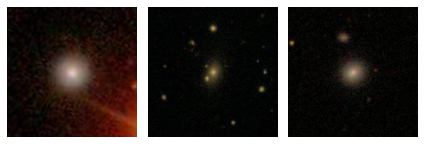

In [ ]:
for num, file in enumerate(os.listdir('/content/galaxy-zoo-clean/data/train/elliptical')[0:3]):
    img = image.load_img(os.path.join('/content/galaxy-zoo-clean/data/', 'train', 'elliptical', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

# New Section

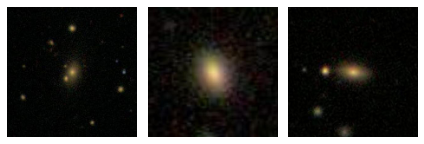

In [ ]:
# lenticular class
for num, file in enumerate(os.listdir('/content/galaxy-zoo-clean/data/train/lenticular')[0:3]):
    img = image.load_img(os.path.join('/content/galaxy-zoo-clean/data/', 'train', 'lenticular', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

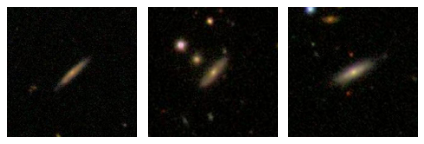

In [ ]:
# spiral class
for num, file in enumerate(os.listdir('/content/galaxy-zoo-clean/data/train/spiral')[0:3]):
    img = image.load_img(os.path.join('/content/galaxy-zoo-clean/data/', 'train', 'spiral', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
train_directory = '/content/galaxy-zoo-clean/data/train'
validation_directory= '/content/galaxy-zoo-clean/data/validation'

In [ ]:
total_train = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_train += len(os.listdir(os.path.join(train_directory, c)))
print('Total train:', total_train)

total_validation = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_validation += len(os.listdir(os.path.join(validation_directory, c)))
print('Total validation:', total_validation)

Total train: 14856
Total validation: 3715


In [ ]:
BS=32

In [ ]:
#data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=25,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.2)
validation_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_directory,
                                                    target_size=(224,224),
                                                    batch_size=BS,
                                                    shuffle=True,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_directory,
                                                         target_size=(224,224),
                                                         batch_size=BS,
                                                         shuffle=True,
                                                         class_mode='categorical')
train_steps = np.ceil(train_generator.samples / train_generator.batch_size)
val_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)

Found 14856 images belonging to 3 classes.
Found 3715 images belonging to 3 classes.


In [ ]:

from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model_inceptionv3 = InceptionV3(input_shape=(224,224,3), 
                   include_top=False,
                   weights="imagenet")

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
base_model_inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation
inceptionv3_model=Sequential()
inceptionv3_model.add(base_model_inceptionv3)
inceptionv3_model.add(GlobalAveragePooling2D()),
inceptionv3_model.add(Dropout(0.2))
inceptionv3_model.add(Flatten())
inceptionv3_model.add(BatchNormalization())
inceptionv3_model.add(Dense(512,kernel_initializer='he_uniform'))
inceptionv3_model.add(BatchNormalization())
inceptionv3_model.add(Activation('relu'))
inceptionv3_model.add(Dropout(0.2))
inceptionv3_model.add(Dense(512,kernel_initializer='he_uniform'))
inceptionv3_model.add(BatchNormalization())
inceptionv3_model.add(Activation('relu'))
inceptionv3_model.add(Dropout(0.7))
inceptionv3_model.add(Dense(3,activation='softmax'))
inceptionv3_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 512)               1

In [ ]:
from tensorflow.keras import losses
LOSS= tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0, reduction="auto", name="categorical_crossentropy")
inceptionv3_model.compile(loss=LOSS,
              optimizer='adam',
              metrics=['accuracy','AUC','Precision','Recall'],
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=10, restore_best_weights=False)

In [ ]:
base_learning_rate = 0.0001

inceptionv3_model.compile(loss='categorical_crossentropy',
              metrics=['accuracy','AUC','Precision','Recall'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate))

In [ ]:
model_history=inceptionv3_model .fit(train_generator,
                        validation_data=validation_generator,
                        epochs = 20)


Epoch 1/20
465/465 [==============================] - 297s 589ms/step - loss: 0.7961 - accuracy: 0.6798 - auc: 0.8648 - precision: 0.6867 - recall: 0.6644 - val_loss: 0.4012 - val_accuracy: 0.8380 - val_auc: 0.9579 - val_precision: 0.8407 - val_recall: 0.8355
Epoch 2/20
465/465 [==============================] - 269s 579ms/step - loss: 0.4243 - accuracy: 0.8288 - auc: 0.9510 - precision: 0.8324 - recall: 0.8234 - val_loss: 0.2865 - val_accuracy: 0.8740 - val_auc: 0.9762 - val_precision: 0.8771 - val_recall: 0.8721
Epoch 3/20
465/465 [==============================] - 268s 577ms/step - loss: 0.3437 - accuracy: 0.8590 - auc: 0.9662 - precision: 0.8626 - recall: 0.8531 - val_loss: 0.2917 - val_accuracy: 0.8756 - val_auc: 0.9746 - val_precision: 0.8773 - val_recall: 0.8716
Epoch 4/20
465/465 [==============================] - 268s 576ms/step - loss: 0.3010 - accuracy: 0.8761 - auc: 0.9736 - precision: 0.8783 - recall: 0.8739 - val_loss: 0.2924 - val_accuracy: 0.8899 - val_auc: 0.9750 - val

In [ ]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

recall=model_history.history['recall']
val_recall=model_history.history['val_recall']

precision=model_history.history['precision']
val_precision=model_history.history['val_precision']

epochs_range = range(len(acc))  # range for the number of epochs

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./plots-v2.png')


plt.show()



In [ ]:
recall=model_history.history['recall']
val_recall=model_history.history['val_recall']

precision=model_history.history['precision']
val_precision=model_history.history['val_precision']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, recall, label='Training Recall')
plt.plot(epochs_range, val_recall, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, precision, label='Training Precision')
plt.plot(epochs_range, val_precision, label='Validation Precision')
plt.legend(loc='upper right')
plt.title('Training and Validation Precision')
plt.savefig('./plots-v2.png')


plt.show()


